<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/30405%EA%B9%80%EC%8B%9C%EA%B2%B8_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EB%AF%B8%EB%9E%98%EC%82%AC%ED%9A%8C_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모듈 가져오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 학습 데이터 생성용 ImageDataGenerator 설정 및 인스턴스 생성
train_datagen = ImageDataGenerator(
    rescale = 1/255, # 정규화 설정
    rotation_range = 360, # 회전 각도 범위 360도 - 구체이기 때문
    width_shift_range = 0.2, # 가로 방향 이동 비율 범위 20%
    height_shift_range = 0.2, # 세로 방향 이동 비율 범위 20%
    zoom_range = 0.2, # 확대 비율 범위 20%
    horizontal_flip = True, # flip 속성을 True로 설정 - 구체이기 때문
    vertical_flip = True,
    fill_mode =  'nearest' # 'nearest' #'constant' # 빈 공간을 주변 색으로 하기 위해 nearest
)

In [ ]:
# 테스트 데이터 생성용 ImageDataGenerator 설정 및 인스턴스 생성
test_datagen = ImageDataGenerator(
    rescale = 1/255 # 정규화 설정
)

In [ ]:
# 제너레이터가 사용할 데이터 경로
train_path = '/content/drive/MyDrive/30405ksg/train'
test_path = '/content/drive/MyDrive/30405ksg/test'
# 제너레이터가 생성할 이미지 사이즈
input_shape = (300, 300, 3)
# 제터레이터가 생성할 레이블 유형
label_type = 'categorical'
# 제너레이터가 한 번에 생성할 이미지 개수
batch_size = 32

In [ ]:
# 학습용 이미지 파일을 읽어 데이터를 생성하는 제너레이터 초기화
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 30 images belonging to 3 classes.


In [ ]:
# 테스트용 이미지 파일을 읽어 데이터를 생성하는 제너레이터 초기화
test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 9 images belonging to 3 classes.


In [ ]:
# 생성된 데이터(x_batch)와 레이블(y_batch) 가져오기
x_batch, y_batch = next(train_generator)

In [ ]:
# 생성된 데이터(x) 정보 확인하기
print('생성된 이미지 개수 :', len(x_batch))
print('이미지의 타입 :', type(x_batch))
print('이미지의 형태 :', x_batch.shape)

생성된 이미지 개수 : 30
이미지의 타입 : <class 'numpy.ndarray'>
이미지의 형태 : (30, 300, 300, 3)


In [ ]:
# 생성된 레이블(y) 정보 확인하기
print('생성된 레이블 개수 :', len(y_batch))
print('레이블의 타입 :', type(y_batch))
print('레이블의 형태 :', y_batch.shape)

생성된 레이블 개수 : 30
레이블의 타입 : <class 'numpy.ndarray'>
레이블의 형태 : (30, 3)


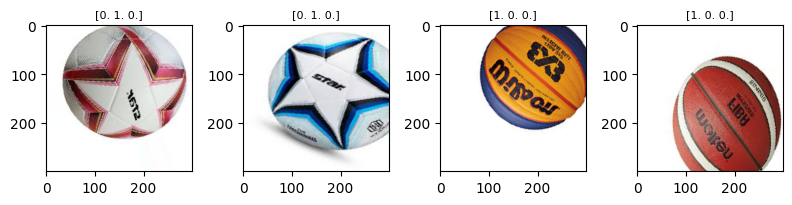

In [ ]:
# 생성된 데이터 이미지 형태로 출력하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))

for i in range(4):
    plt.subplot(1, 5, i+1) #plt.subplot(1, 5, i+1)
    plt.imshow((x_batch[i] * 255).astype('uint8'))
    plt.title(str(y_batch[i]), fontsize = 8)
    #plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 모듈 가져오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [ ]:
# 모델 생성 및 층 구성하기
model = Sequential()
model.add(Input(shape=(300, 300, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# 모델 구조 확인하기
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,523,459 (85.92 MB)

 Trainable params: 22,523,459 (85.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습 방법 설정하기
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
print(len(train_generator))

1


In [ ]:
# 모델 학습시키기
model.fit(
    train_generator,
    steps_per_epoch = 1, # len(train_generator)
    epochs = 100,

)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.2333 - loss: 1.1556
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 68.5563
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3667 - loss: 5.0924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step - accuracy: 0.3333 - loss: 42.3715
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - accuracy: 0.3333 - loss: 26.5374
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - accuracy: 0.3667 - loss: 6.8250
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 7.0230
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [ ]:
# 테스트 손실과 테스트 정확도 구하기
test_loss, test_accuracy = model.evaluate(
    test_generator,
    verbose = 0
)
print('테스트 손실 :', test_loss, '테스트 정확도 :', test_accuracy)

테스트 손실 : 0.9070555567741394 테스트 정확도 : 0.7777777910232544


In [ ]:
import numpy as np

# 이미지를 배열 형태로 변환하기 위한 제너레이터 초기화
predict_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/30405ksg/predict',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode = None,
    shuffle = False
)

# 제너레이터를 이용한 모델의 예측 수행
predictions = model.predict(predict_generator, steps=len(predict_generator))
predicted_classes = np.argmax(predictions, axis=1)
class_labels = ['basketball', 'football', 'tennis']
predicted_class_labels = [class_labels[idx] for idx in predicted_classes]
for i, label in enumerate(predicted_class_labels):
    print(f"Image {i+1}: Predicted class: {label}")

Found 2 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Image 1: Predicted class: basketball
Image 2: Predicted class: football


In [ ]:
# 모델 저장하기
model.save('my_model.keras')

In [ ]:
# 모델 가져오기
from keras.models import load_model
loaded_model = load_model('my_model.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,570,379 (257.76 MB)

 Trainable params: 22,523,459 (85.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,046,920 (171.84 MB)